# Introduction <br>

**Cardiovascular diseases (CVDs)** are the leading cause of mortality worldwide, killing an estimated 17.9 million people each year, accounting for 31% of all fatalities worldwide. Heart attacks and strokes cause four out of every five CVD fatalities, and one-third of these deaths occur in adults under the age of 70. CVDs are a common cause of heart failure, and this dataset contains 11 variables that can be used to predict heart disease.

People with cardiovascular disease or at high cardiovascular risk (due to the presence of one or more risk factors such as cholesterol,old-age, or pre-existing illness) require early identification and care, which a machine learning model may greatly assist with.

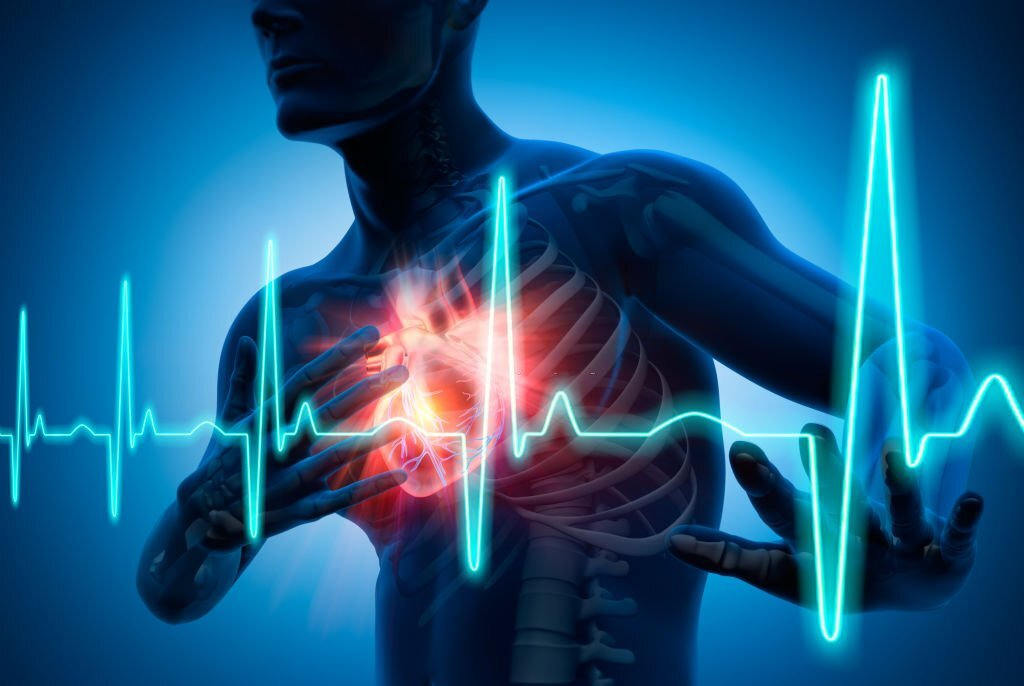
<br>
<br>
<p>

**Attribute Information**

* **`Age:`** age of the patient [years]
    
* **`Sex:`**  sex of the patient [M: Male, F: Female]
    
* **`ChestPainType:`**  chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    
* **`RestingBP:`**  resting blood pressure [mm Hg]
    
* **`Cholesterol:`**  serum cholesterol [mm/dl]
    
* **`FastingBS: `** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    
* **`RestingECG:`**  resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    
* **`MaxHR:`**  maximum heart rate achieved [Numeric value between 60 and 202]
    
* **`ExerciseAngina:`**  exercise-induced angina [Y: Yes, N: No]
    
* **`Oldpeak:`**  oldpeak = ST [Numeric value measured in depression]
    
* **`ST_Slope:`**  the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    
* **`HeartDisease:`**  output class [1: heart disease, 0: Normal]
</p>
    
<br>


# Importing Main Libraries

In [69]:
# Importing data processing and Linear Algebra libraries 
import pandas as pd 
import numpy as np

# Importing data visualization libraries 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [70]:
# Readin data from CSV file and loading into df varaible
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df.head(10).style.background_gradient(cmap="Reds")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.500000,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.000000,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.000000,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.000000,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.000000,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.500000,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.000000,Up,0


**`Key Finding: `**
* In the Heart dataset a.k.a **df**, we have 918 rows and 12 coloumns
* Different scales apply to numerical numbers. I must exercise caution while preprocessing since many algorithms call for scaling, and some converge more quickly when we scale all of our numerical variables to the same value. In order for the computer to grasp the catergorical characteristics, we also need to encode them.

# Data Understanding

### A) Data Summary

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [72]:
display(df.describe(include='all')) 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


**`Key Finding: `**
* OldPeak's minimum value is -2.60.Resting blood pressure and cholesterol levels are both zero (which appears clinically implausible).
 
* There are significant class inequalities in various category variables, including 'Sex' and 'ExerciseAngina'. This may result in overfitting, in which our model overperforms on under-represented (unseen) categories. (Sex 'M' has 725 counts and ExerciseAngina: 'N' has '547' counts )

In [73]:
# Finding any missing values
missing_data = df.isnull().sum() / len(df) * 100
missing_data

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

* Greatt !!!, dataset has no missing values, which saves us time addressing them (dropping columns, rows, or imputation, for example).

In [74]:
for i in list(df.columns):
    print("Number of Unique values in {} :  {} ".format(i,df[i].value_counts().shape[0]))

Number of Unique values in Age :  50 
Number of Unique values in Sex :  2 
Number of Unique values in ChestPainType :  4 
Number of Unique values in RestingBP :  67 
Number of Unique values in Cholesterol :  222 
Number of Unique values in FastingBS :  2 
Number of Unique values in RestingECG :  3 
Number of Unique values in MaxHR :  119 
Number of Unique values in ExerciseAngina :  2 
Number of Unique values in Oldpeak :  53 
Number of Unique values in ST_Slope :  3 
Number of Unique values in HeartDisease :  2 


In [75]:
column_list = df.columns
for i in df.columns:
    print('Unique values in attribute: ',i,df[i].unique())
    print('*'*100)
    print('\n')

Unique values in attribute:  Age [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
****************************************************************************************************


Unique values in attribute:  Sex ['M' 'F']
****************************************************************************************************


Unique values in attribute:  ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
****************************************************************************************************


Unique values in attribute:  RestingBP [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
*********************************************************************************

### B) Data Seperation ( categorical and numerical list )

In [76]:
# converting the column names into lower strings 
df.columns = df.columns.str.lower()

# categorical data
catg_lst = df.select_dtypes(include='object').columns
#catg_lst  = list(['sex','chestpaintype','restingecg','exerciseangina','st_slope'])   #object

# numerical data
num_lst = df.select_dtypes(include=['int64','float64']).columns
#num_lst = list(['age','restingbp','cholesterol','fastingbs','maxhr','oldpeak','heartdisease']) #int64

### C) IQR Anlaysis

The IQR indicates where the majority of the data is located. We can see where the centre 50% of the data is, which gives us a fair idea of a "typical" range for each attribute.

In [77]:
# ----> numerical data list
low_range = df[num_lst].quantile(0.25)
high_range = df[num_lst].quantile(0.75)
iqr_num_list_data = pd.DataFrame({
    'Features':num_lst,
    'Majority of the values':[f'{low_range.loc[i]} - {high_range.loc[i]}' for i in num_lst]})

iqr_num_list_data['percentage of values'] = [round( ((df[i]>=low_range.loc[i]) & (df[i]<=high_range.loc[i])).mean() *100,2)
                            for i in num_lst]


# ----> categorical data list 
cat_elem_range = df[catg_lst].apply(lambda x: x.value_counts().idxmax())
perc_data = df[catg_lst].apply(lambda x: round(x.value_counts().max()/len(x)*100,2)) 
iqr_catg_list_data = pd.DataFrame({
'Features':catg_lst,
'Majority of the values':cat_elem_range,
'percentage of values':perc_data })


#Concating two dataframe
#pd.merge(iqr_num_list_data, iqr_catg_list_data)
iqr_data = pd.concat([iqr_num_list_data, iqr_catg_list_data],axis=0,join='outer')
iqr_data.sort_values(by='percentage of values',ascending=False,inplace=True)
iqr_data.reset_index(drop=True, inplace=True)

# printing final IQR dataframe
iqr_data

,Features,Majority of the values,percentage of values
0,heartdisease,0.0 - 1.0,100.00
1,sex,M,78.98
2,fastingbs,0.0 - 0.0,76.69
3,oldpeak,0.0 - 1.5,74.40
4,restingecg,Normal,60.13
5,exerciseangina,N,59.59
6,restingbp,120.0 - 140.0,58.50
7,chestpaintype,ASY,54.03
8,age,47.0 - 60.0,51.96
9,maxhr,120.0 - 156.0,51.42


* Created a data-centric standpoint using an IQR table, suggesting that our model's best performance would most likely be on data inside these IQR bounds.

### D) Box Plot ( outlier analysis )

<Axes: >

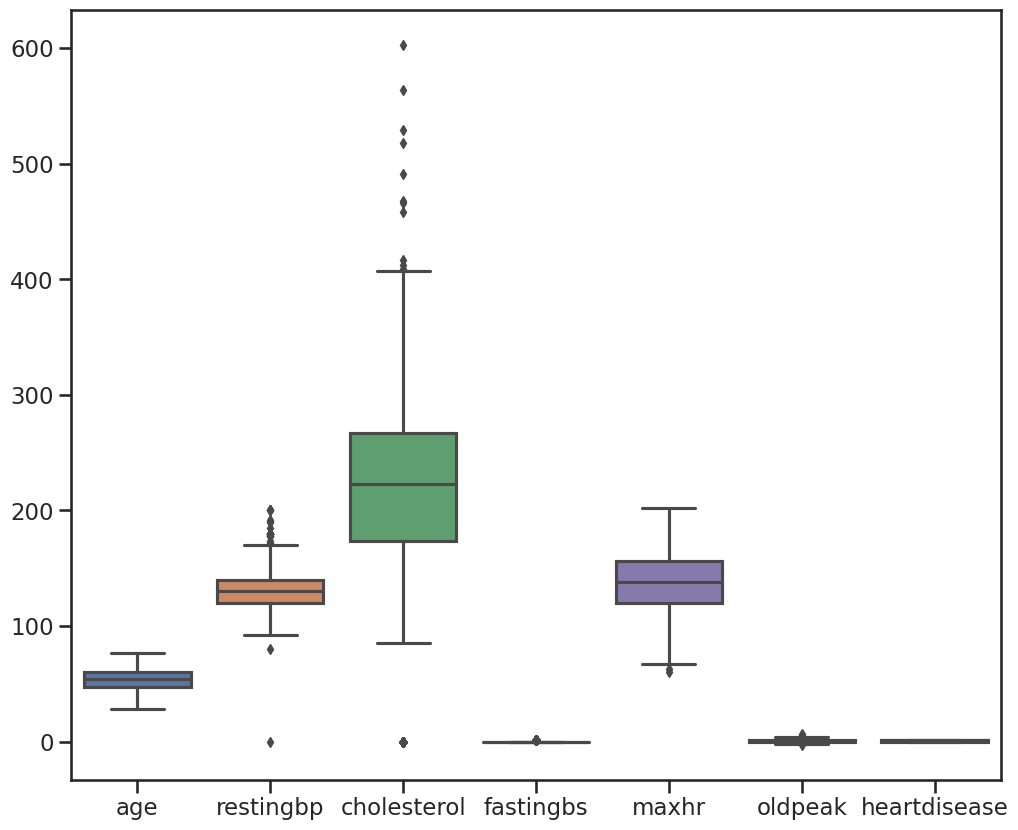

In [78]:
fig = plt.figure(figsize=(12,10))
sns.boxplot(data = df[num_lst])

**`Key Finding: `**
* Outliers and negative values within particular features ('RestingBP,' 'Cholesterol,' 'Oldpeak') that might contribute noise and distort the model's learning process should be avoided.

# Data Cleaning

* The 'Cholesterol' and 'RestingBP had surprising values, such that Cholesterol and RestingBP cannot be 0; which is clinically impossible.
* However, 'oldpeak' can have negative values which is possible in real world cases, so we not doing any data cleaning on 'oldpeak' 

In [79]:
# Assesing the magnitude of zero in ['cholesterol','restingbp'] feature
(df[['cholesterol','restingbp']]==0).sum()

cholesterol    172
restingbp        1
dtype: int64

**`Key Finding: `**

* Only one patient has an invalid 'RestingBP'. This record can be deleted from our database. Cholesterol, on the other hand, has 172 incorrect observations.

* It would be preferable to replace the data with mean/median, or even better, regression. However, it would have an effect on the machine learning model. Instead of replacing, we may eliminate 172 clinically impossible data points from the dataset.


* I understand that eliminating this data isn't ideal because we lose a lot of essential information, but we still have a reasonable quantity of data.

* If the 'cholesterol' characteristic is unimportant, we may delete the entire column, which will enhance the model's performance.

### A) Removing irrelevant datapoints from dataset

In [80]:
old_data = df.copy()
df = df[ (df['cholesterol']!=0) & (df['restingbp']!=0) ]
print('Old Data Shape: ',old_data.shape)
print('New Data Shape: ',df.shape)

Old Data Shape:  (918, 12)
New Data Shape:  (746, 12)


* Our dataset is extensive and ready to go on to modelling and analysis stages.

# Exploratory Data Analysis

### A) Proportion of patients who have heart disease in our dataset

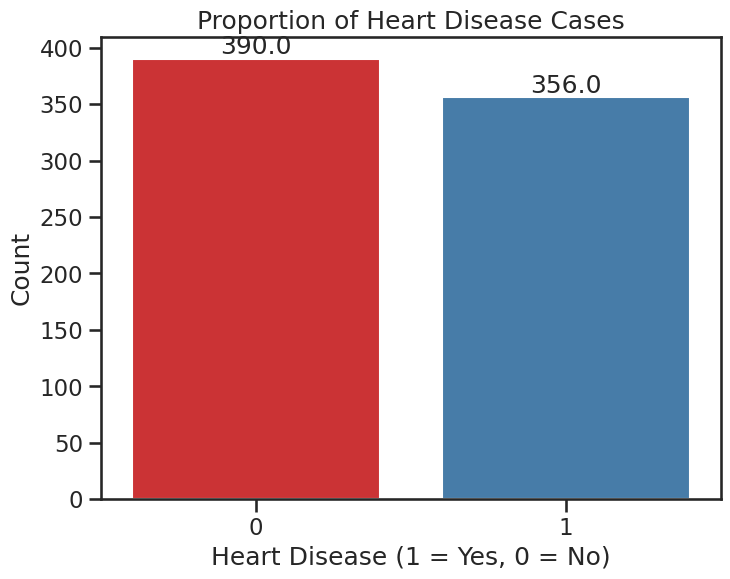

In [81]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='heartdisease', palette="Set1")

# Set labels and title
plt.xlabel("Heart Disease (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.title("Proportion of Heart Disease Cases")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
# Show the plot
plt.show()


### B) Univariate Analysis

#### 1) Numerical Univariate Variable Analysis

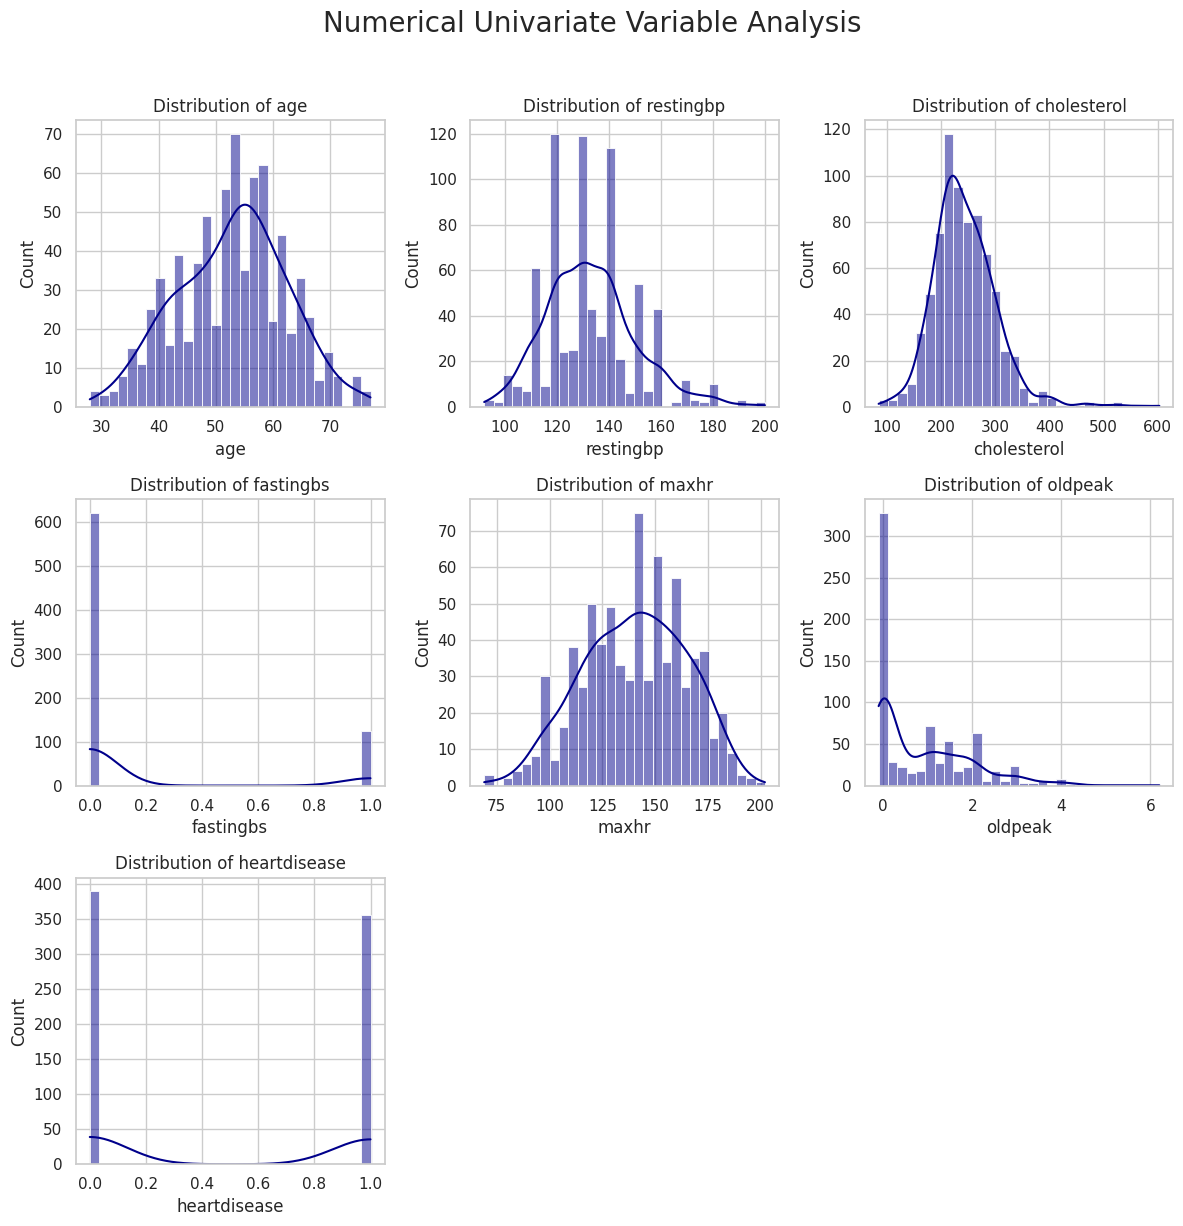

In [82]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for i, col in enumerate(num_lst):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df[col],color='darkblue',kde=True,bins=30)
    plt.title(f'Distribution of {col}')
    
# removing empty subplots
num_columns = len(num_lst)
num_rows = num_columns // 3 + (1 if num_columns % 3 != 0 else 0)
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])
    
fig.suptitle('Numerical Univariate Variable Analysis',fontsize=20,y=1.02)    
plt.subplots_adjust(top=1.88)
plt.tight_layout()
plt.show()


#### 2) Categorical Univariate Variable Analysis

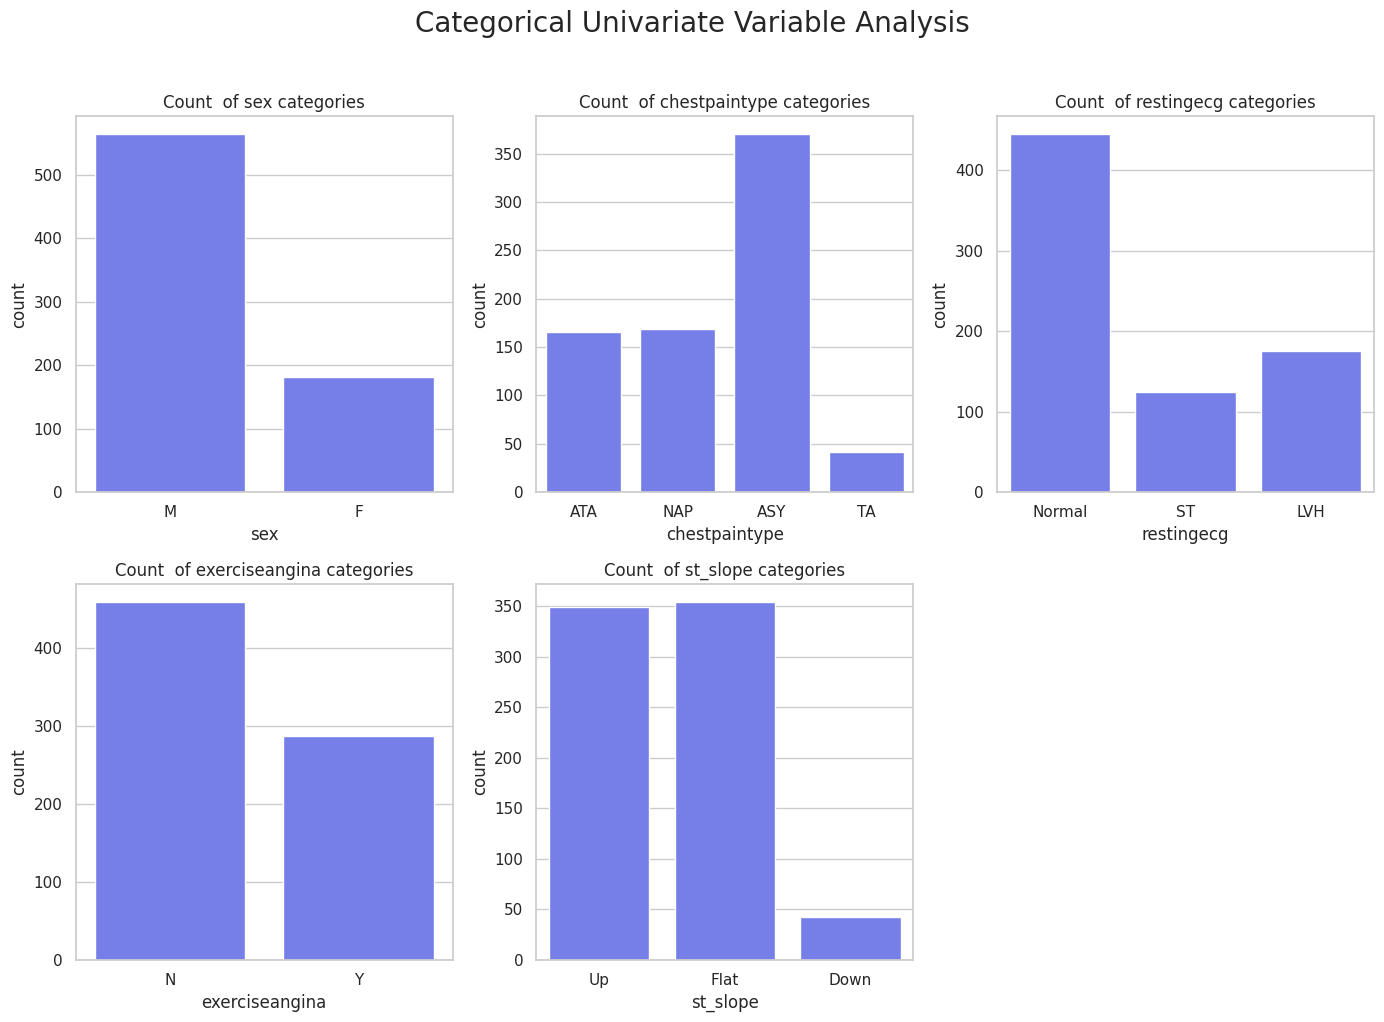

In [83]:
color = '#636EFA'
sns.set(style="whitegrid")
fig,axes = plt.subplots(2,3,figsize=(14,10))
for i,col in enumerate(catg_lst):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df,x=df[col],color=color)
    plt.title(f'Count  of {col} categories')

# removing empty subplots   
num_columns = len(catg_lst)
num_rows = num_columns // 3 + (1 if num_columns % 3 != 0 else 0)
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])
    
fig.suptitle('Categorical Univariate Variable Analysis',fontsize=20,y=1.02)        
plt.subplots_adjust(top=0.88)
plt.tight_layout()
plt.show()

##### **`Key Findings in Univariate Analysis:`**
* Based on the analysis of the "Gender" categorical variable, it is evident that the dataset has a majority of males (79%).
* The age distribution is relatively symmetrical, with a peak in the middle, suggesting that dataset contains a wide range of ages, but mostly lies in the range between 50 and 60's.
*  Asymptomatic (ASY) and non-anginal (NAP) chest pain are the two most typical types. Patients with TA (typical angina) and ATA (atypical angina) are less common.
* When exercising, most people do not develop angina (chest discomfort). Given that there is more information available for individuals without exercise-induced anginal symptoms, the model may perform better in their case.
* Most patients' resting electrocardiographic results are normal. The remaining patients are approximately evenly divided between those who have ST-T wave abnormalities and those who exhibit possible or certain left ventricular hypertrophy.


### C) Bivariate Analysis

#### 1) Numerical Bivariate Variable Analysis

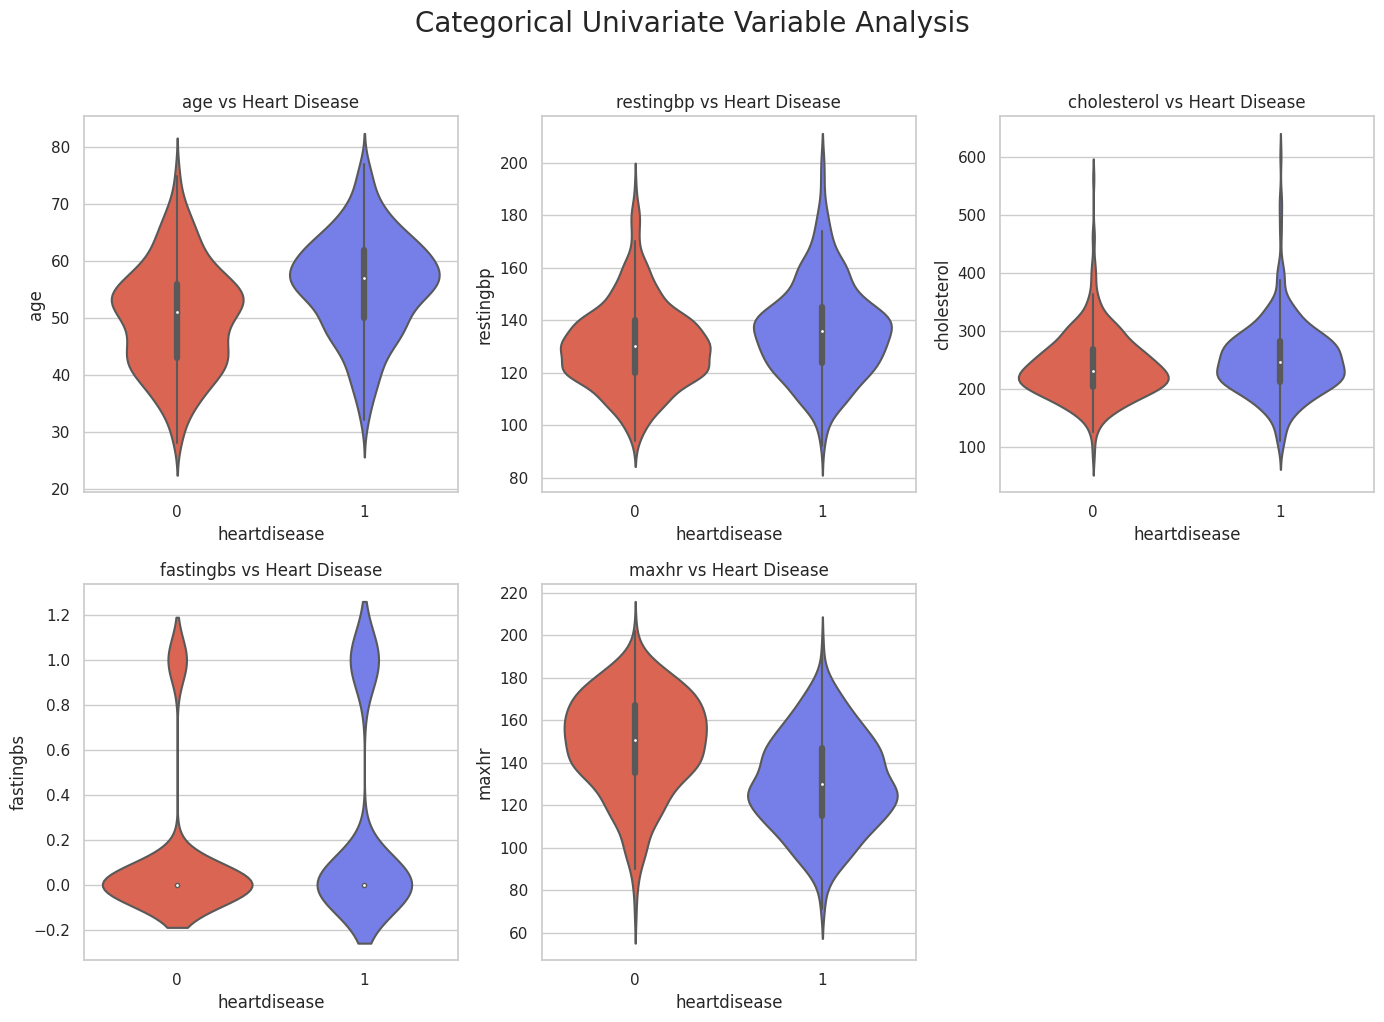

In [84]:
color = ['#EF553B','#636EFA']
sns.set(style="whitegrid")

fig,axes = plt.subplots(2,3,figsize=(14,10))
for i,col in enumerate(num_lst[:-1]):
    plt.subplot(2,3,i+1)
    sns.violinplot(data=df,y=df[col],x='heartdisease',palette=color)
    plt.title(f'{col} vs Heart Disease')

# removing empty subplots    
num_columns = len(catg_lst)
num_rows = num_columns // 3 + (1 if num_columns % 3 != 0 else 0)
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])
    
fig.suptitle('Categorical Univariate Variable Analysis',fontsize=20,y=1.02)        
plt.subplots_adjust(top=0.88)
plt.tight_layout()
plt.show()

#### 2) Categorical Bivariate Variable Analysis

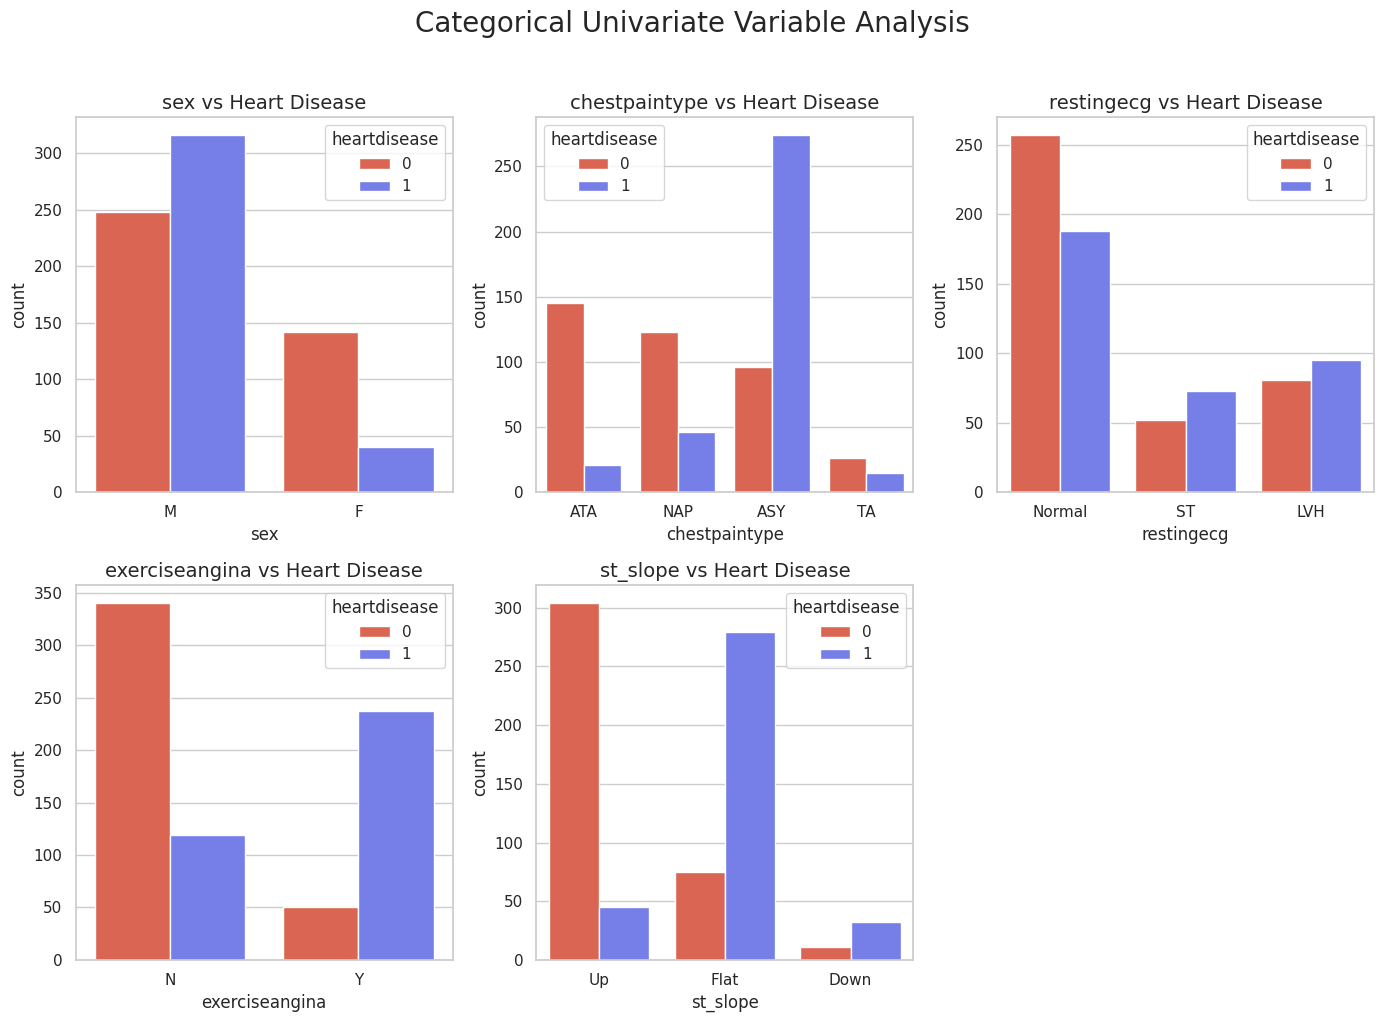

In [85]:
color = ['#EF553B','#636EFA']
sns.set(style="whitegrid")

fig,axes = plt.subplots(2,3,figsize=(14,10))
for i,col in enumerate(catg_lst):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df,x=df[col],hue='heartdisease',palette=color)
    plt.title(f'{col} vs Heart Disease',fontsize=14)

# removing empty subplots    
num_columns = len(catg_lst)
num_rows = num_columns // 3 + (1 if num_columns % 3 != 0 else 0)
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])
    
fig.suptitle('Categorical Univariate Variable Analysis',fontsize=20,y=1.02)        
plt.subplots_adjust(top=0.88)
plt.tight_layout()
plt.show()

##### **`Key Findings in Bivariate Analysis:`**
* Age & Sex: In the sample, older males are more likely to develop heart disease than older females. 
* Heart disease is more likely to affect persons whose resting blood pressure is more than 140. 
* Data on cholesterol indicate that heart disease and resting blood pressure have a similar association. It implies that there may be a slender correlation between heart disease and increased cholesterol levels. Several individuals have abnormal blood test results that are above 600 mg/dl, and they are all heart disease patients.
* MaxHR Heart disease is less likely to affect those with greater maximum heart rates.
* Patients who have cardiac disease are more likely to have a greater Oldpeak value (ST depression brought on by activity compared to rest).
* Chest Pain Type: Heart disease is more likely to affect patients with asymptomatic chest pain (ASY) than with non-anginal pain (NAP) or atypical angina (ATA).
* Exercise-Induced Angina: Heart disease is more prevalent in those who have angina while exercising.
* Resting ECG: Heart disease is more likely to affect patients with ST-T wave abnormalities (ST) or probable/definite left ventricular hypertrophy (LVH) than it is to affect individuals with normal ECGs.
* ST Slope: Heart disease is more likely to affect patients with a flat ST slope than those who have an up- or down-sloping ST slope.


### D) Pair Plot

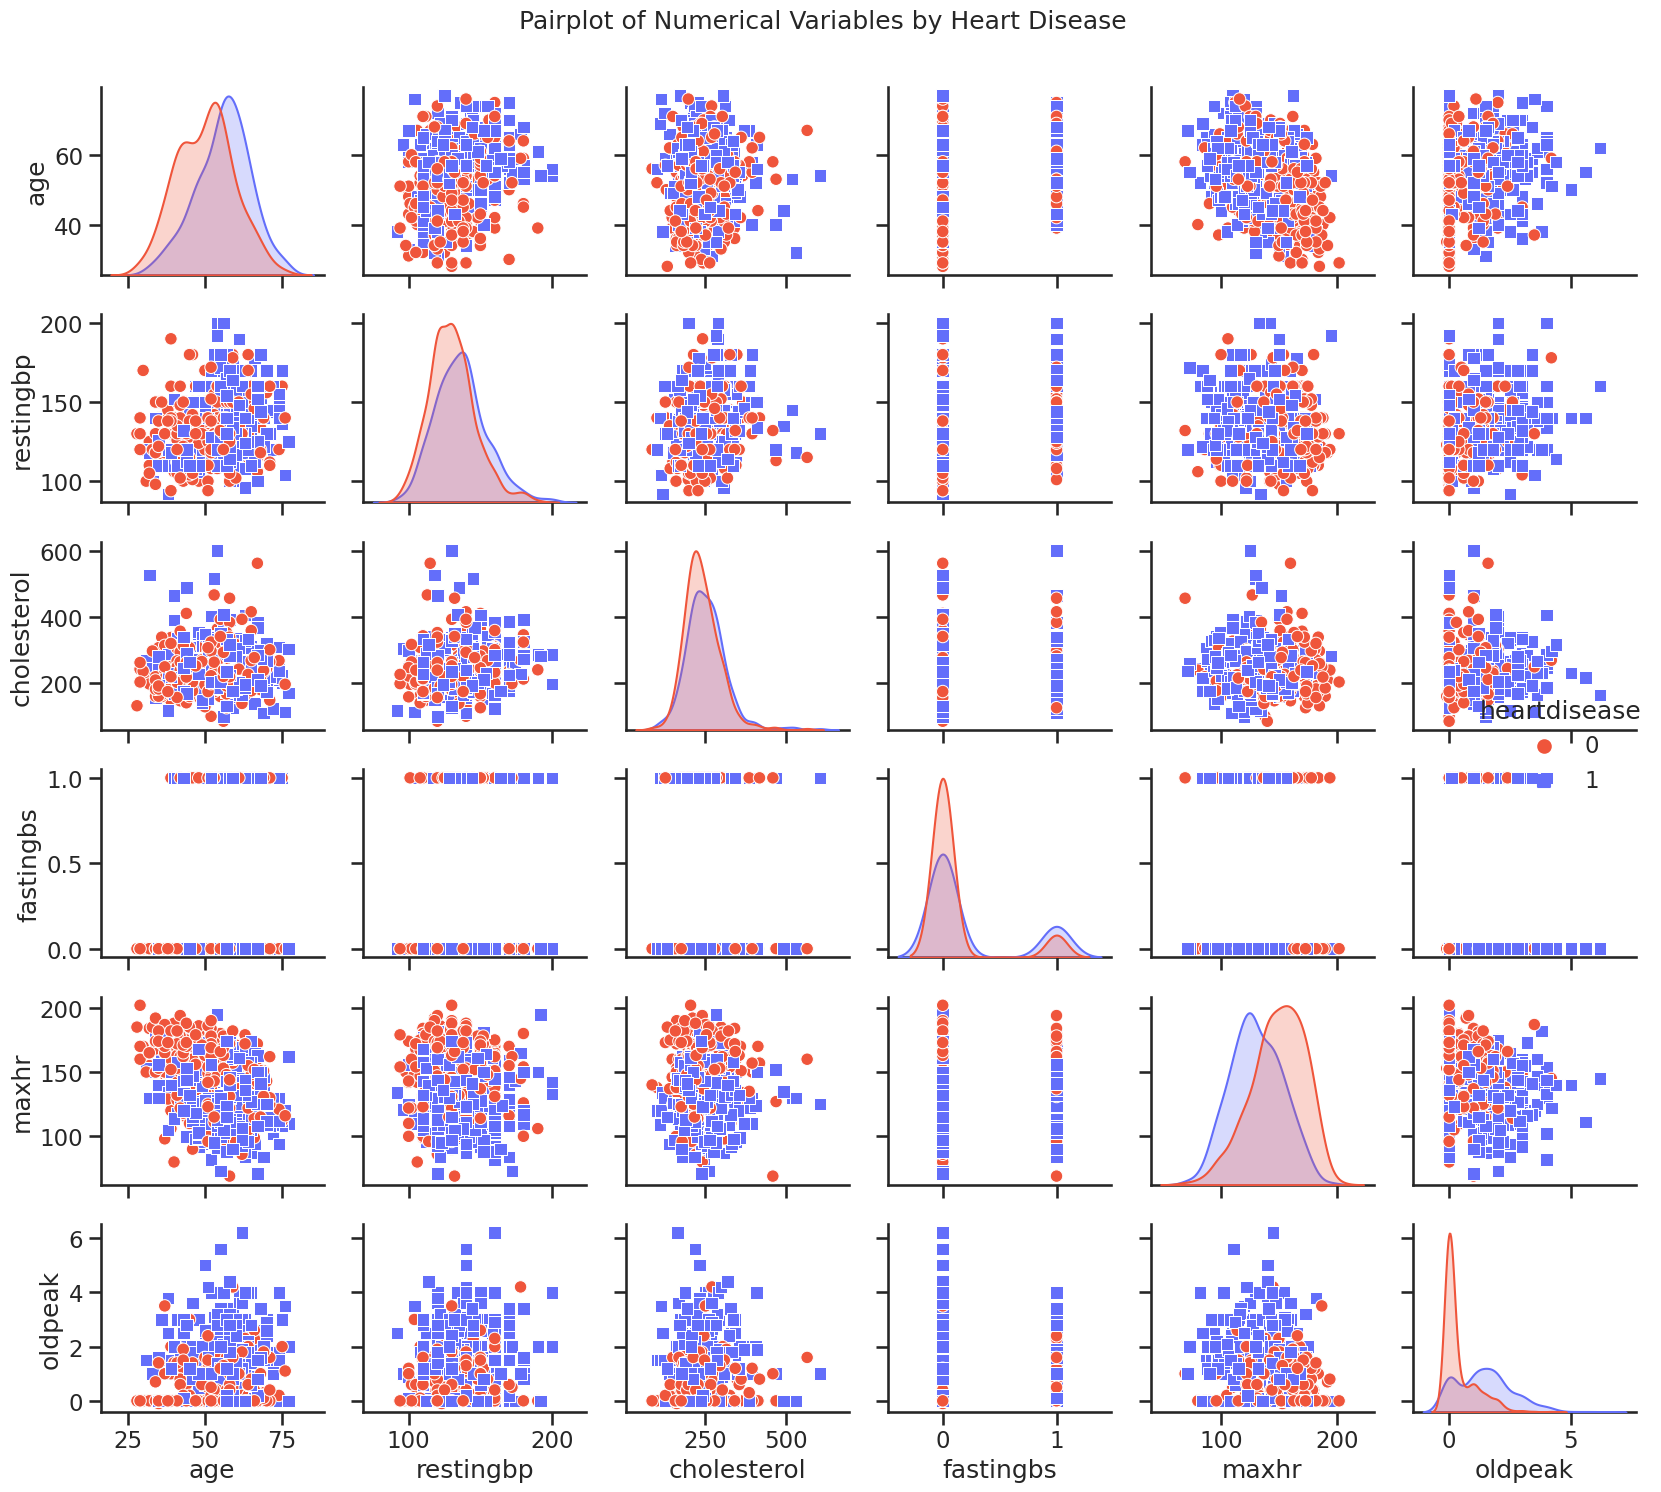

In [86]:
sns.set(style="ticks")
sns.set_context("talk")
pairplot = sns.pairplot(data=df[num_lst], hue='heartdisease', palette=color,markers=['o','s'])
plt.subplots_adjust(top=1)
pairplot.fig.suptitle("Pairplot of Numerical Variables by Heart Disease", fontsize=18,y=1)
plt.tight_layout()
plt.show()

### E) Multi-Variate Analysis

As we saw in pair plot, fastingbs doesn;t show any relationship to others so we removing it from multivariate analysis

In [87]:
new_num_list = ['age', 'restingbp', 'cholesterol', 'maxhr', 'oldpeak']

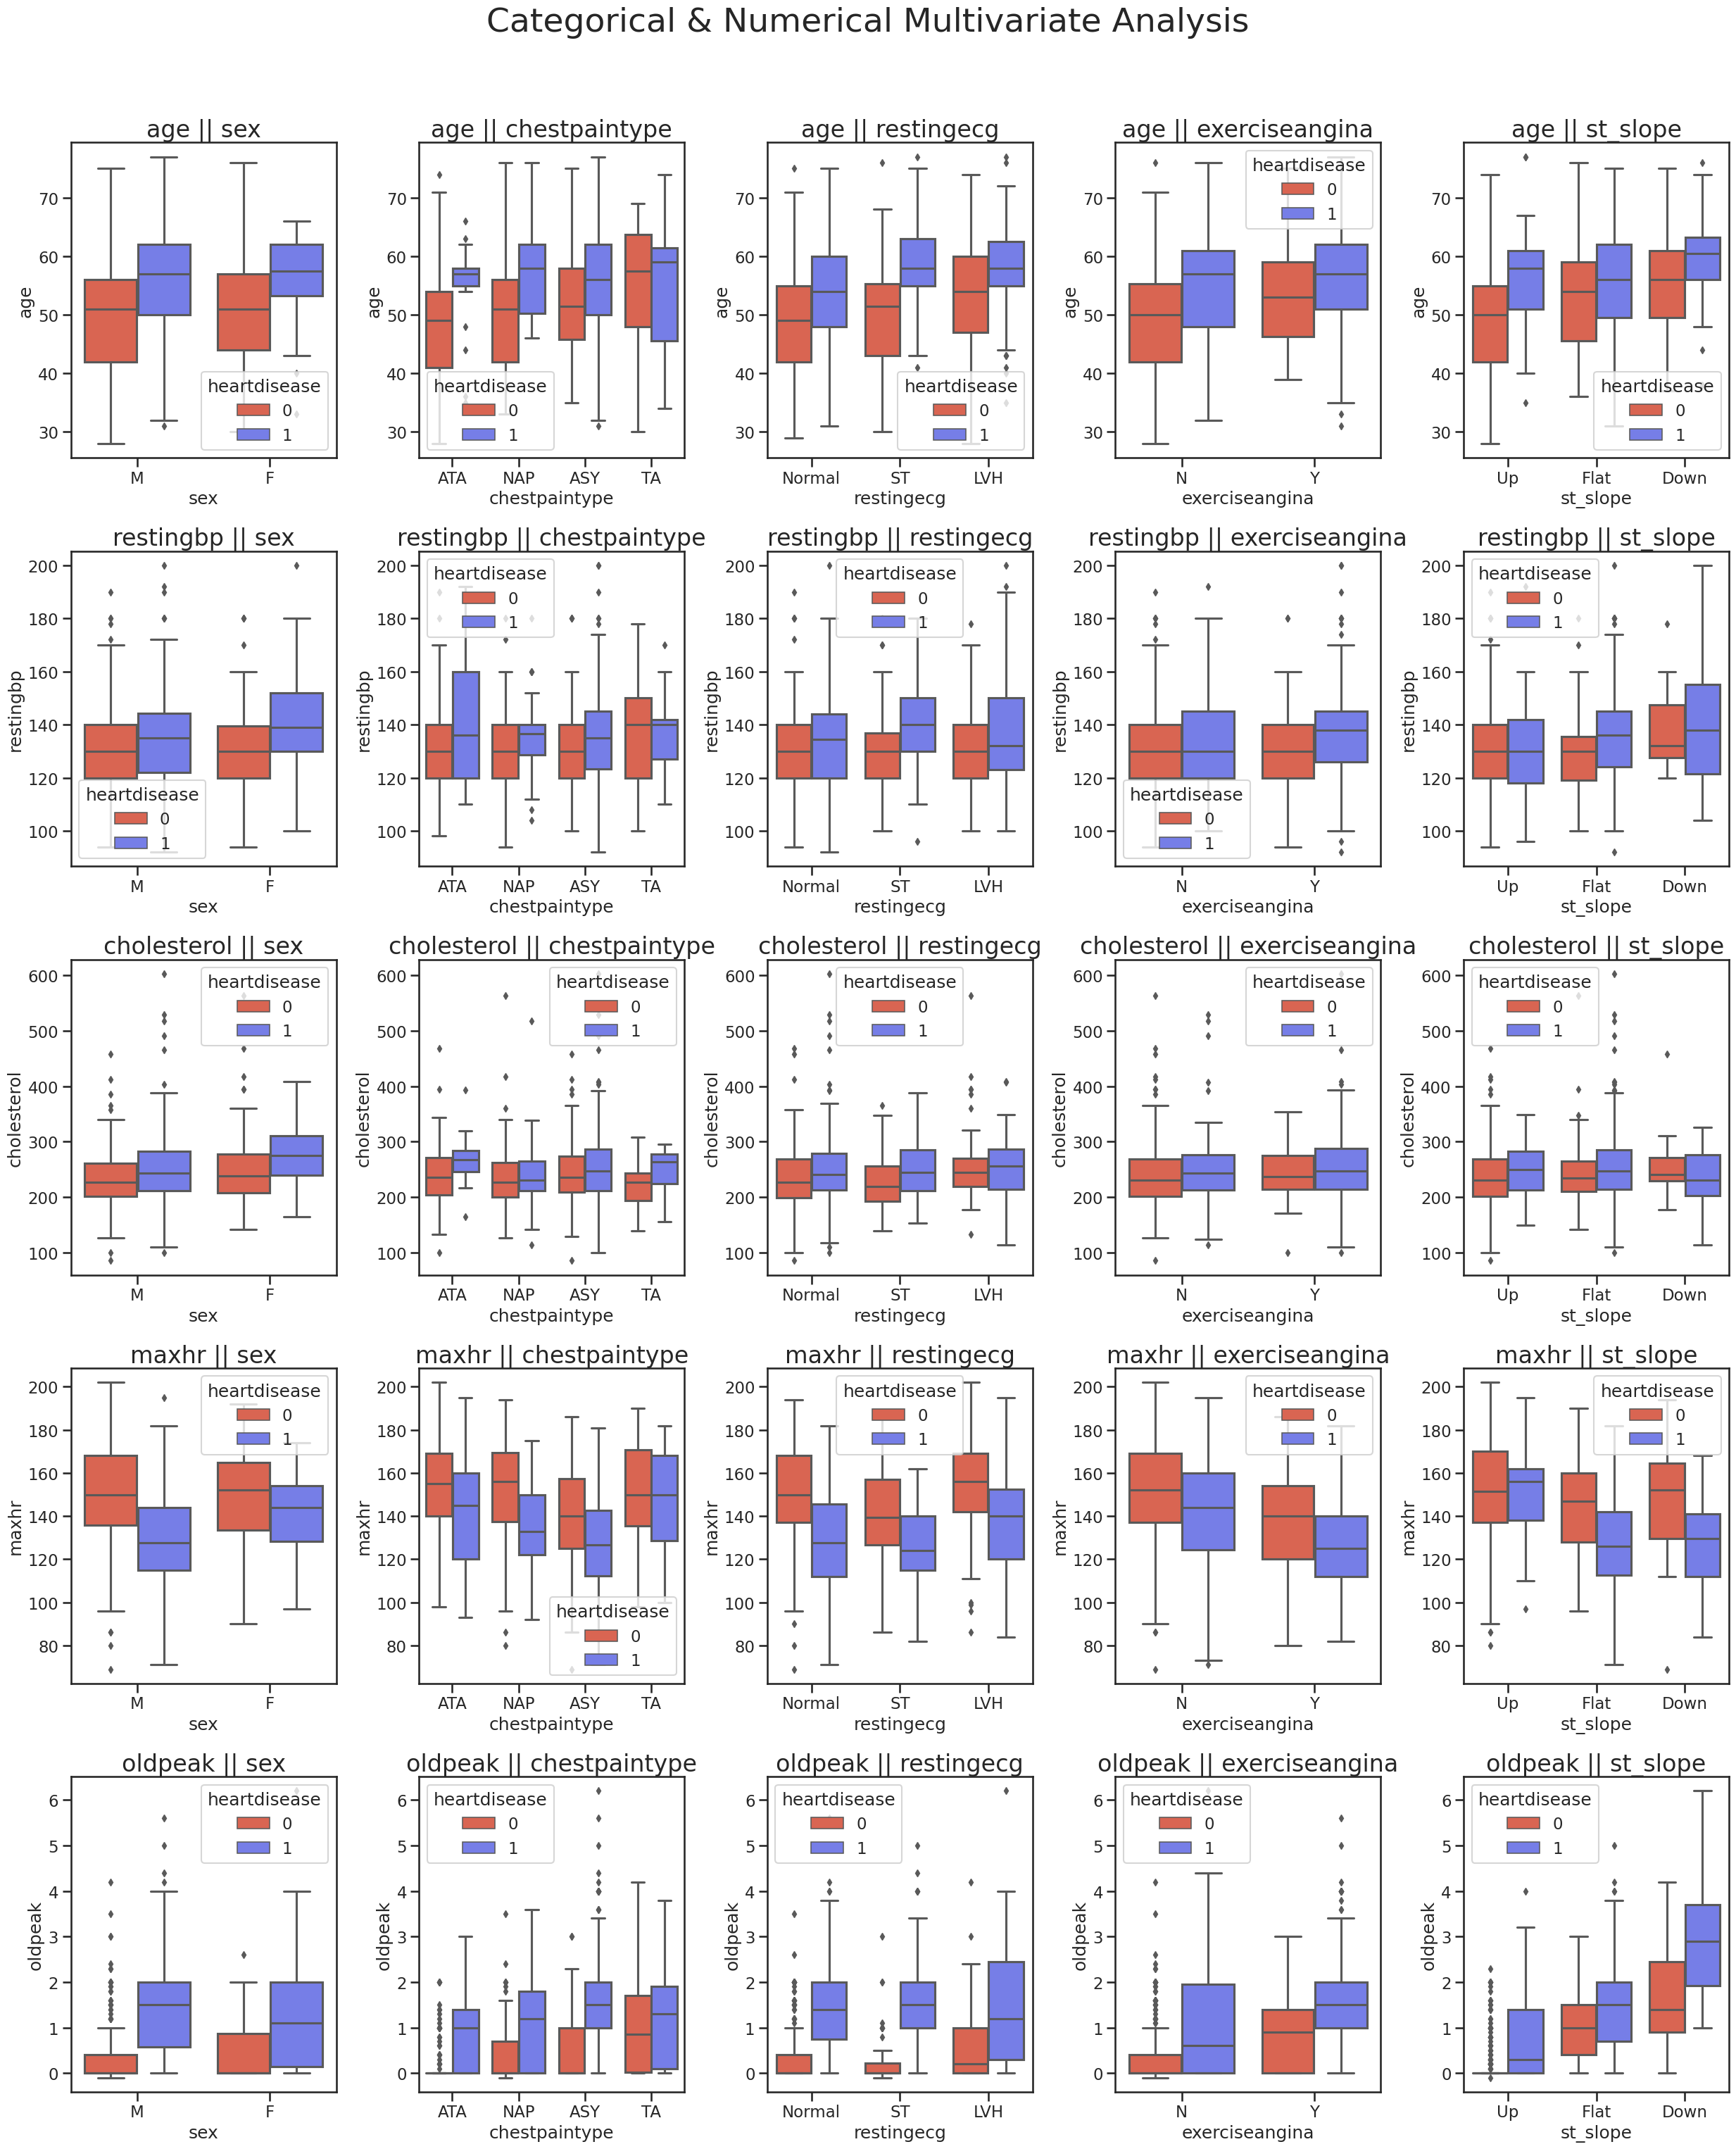

In [88]:
fig, ax = plt.subplots(5,5, figsize=(25, 30))
count = 0

for i,row in enumerate(new_num_list):
    for j,col in enumerate(catg_lst):
        count+=1
        plt.subplot(5,5,count)
        sns.boxplot(data = df,x=col,y=row,hue='heartdisease',palette=color)
        ax[i,j].set_title(f'{row} || {col}',fontsize=24)
        if(count==26):
            break

fig.suptitle('Categorical & Numerical Multivariate Analysis',fontsize=34,y=1.02)  
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.subplots_adjust(top=1.88)
plt.tight_layout()
plt.show()

##### **`Key Findings in Multivariate Analysis:`**
* Heart Disease Distribution: The combined box plots provide an overview of how various numerical variables and categorical factors relate to heart disease presence or absence. Heart disease cases are generally represented in orange, while non-heart disease cases are in blue.

* Age and Gender: Males are more likely than females to experience the middle 50% of heart disease cases at a younger age, suggesting that male typically begin suffering heart disease at a younger age.

* Exercise and MaxHR: The lower MaxHR readings in this group may be attributable to people with angina who are unable to exercise at their maximum heart rate because of discomfort or pain they suffer.

* Oldpeak and ST_Slope: They are significant predictors of heart disease. Particularly, patients with a downward ST_Slope and high Oldpeak (above 2.5) are very likely to have heart disease.

* Maximum Heart Rate and Heart Disease: Patients without heart disease tend to have slightly higher maximum heart rates (MaxHR) than those with heart disease. However, there is overlap between the two groups, and MaxHR alone may not be a definitive predictor of heart disease.



### E) Correlation Analysis

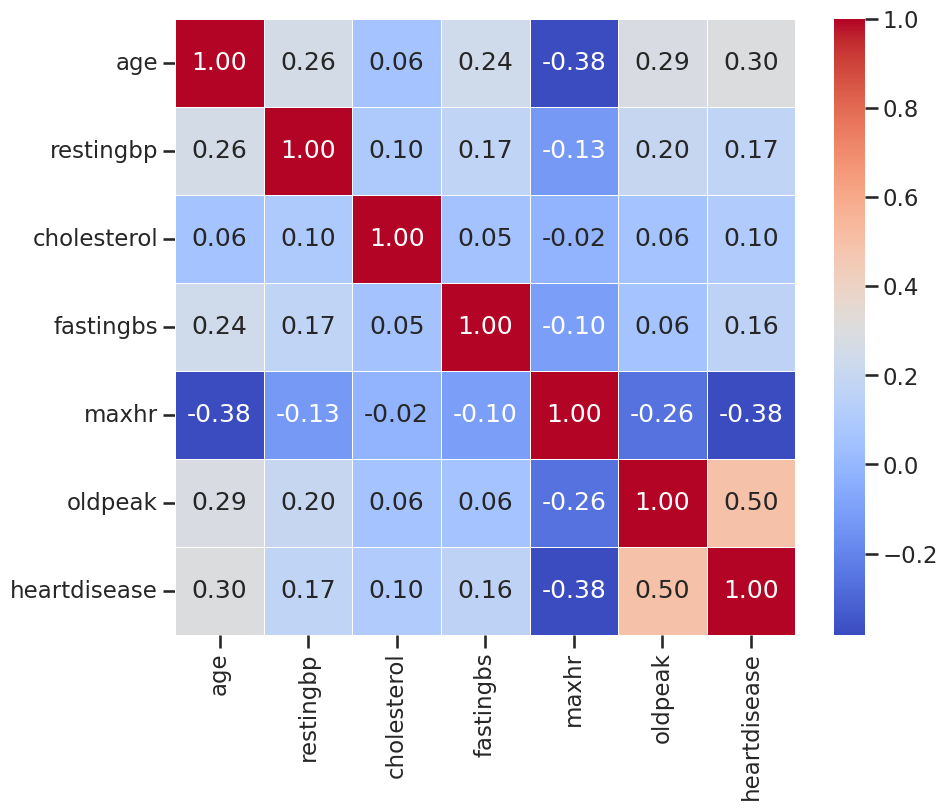

In [89]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_lst].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.show()

##### **`Key Findings in Correlation Analysis:`**
* age & maxhr : Age and maximal heart rate (MaxHR) have a somewhat negative correlation. The maximal heart rate is often a little lower in older persons.
* oldpeak & maxhr : These two feature have a moderate negative correlation suggesting that as "Oldpeak" values slightly increase (indicating more ST depression), "MaxHR" tends to decrease slightly. This indicates that, correlation between them is very weak, indicating that there is no strong linear relationship between these variables.
* heart-disease : Features ( **age , oldpeak, fastinbs, restingbs** ) shows a strong correlation with heartdisease

<br></br>
# Data Preprocessing

In [90]:
df_scalled = pd.get_dummies(df,drop_first = True)
df_scalled.head()

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,heartdisease,sex_M,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,restingecg_Normal,restingecg_ST,exerciseangina_Y,st_slope_Flat,st_slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [91]:
x = df_scalled.drop(['heartdisease'],axis=1) 
y = df_scalled['heartdisease']

### A) Splitting the data

In [92]:
# Importing data spliting data library for training and testing from given dataframe
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=21)

### B) Scalling the data

In [93]:
# Module for Scaling the data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(x)
x_train_std=scaler.transform(x_train)
x_test_std=scaler.transform(x_test)

x_train = pd.DataFrame(x_train_std, columns=x.columns)
x_test = pd.DataFrame(x_test_std, columns=x.columns)

display(x_train.head())
display(x_test.head())

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,sex_M,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,restingecg_Normal,restingecg_ST,exerciseangina_Y,st_slope_Flat,st_slope_Up
0,-0.513925,0.982980,-0.298329,-0.448652,-0.417279,0.091771,-1.760370,-0.534983,-0.541197,-0.241156,0.822438,-0.448652,1.264636,1.052304,-0.937600
1,0.012418,-0.754019,0.496747,-0.448652,-0.417279,-0.840942,-1.760370,-0.534983,1.847756,-0.241156,0.822438,-0.448652,-0.790742,-0.950295,1.066553
2,-1.566610,-1.333019,-0.924240,-0.448652,0.398792,0.091771,0.568063,-0.534983,-0.541197,-0.241156,0.822438,-0.448652,1.264636,1.052304,-0.937600
3,0.749297,0.519780,-0.484411,-0.448652,-1.233351,1.490840,0.568063,-0.534983,-0.541197,-0.241156,0.822438,-0.448652,1.264636,1.052304,-0.937600
4,-0.092851,1.561980,-0.822741,-0.448652,1.010845,-0.840942,0.568063,1.869218,-0.541197,-0.241156,0.822438,-0.448652,-0.790742,-0.950295,1.066553


,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,sex_M,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,restingecg_Normal,restingecg_ST,exerciseangina_Y,st_slope_Flat,st_slope_Up
0,1.486177,1.561980,0.699745,-0.448652,-1.314958,0.558127,0.568063,-0.534983,-0.541197,-0.241156,-1.215897,-0.448652,1.264636,1.052304,-0.937600
1,-0.408656,0.403980,-0.974989,-0.448652,1.296470,-0.840942,0.568063,-0.534983,1.847756,-0.241156,0.822438,-0.448652,-0.790742,-0.950295,1.066553
2,1.380909,0.751380,0.564413,-0.448652,0.480399,-0.840942,-1.760370,-0.534983,1.847756,-0.241156,-1.215897,-0.448652,-0.790742,1.052304,-0.937600
3,1.170372,-0.464519,1.088824,-0.448652,-0.376476,0.837941,0.568063,-0.534983,1.847756,-0.241156,0.822438,-0.448652,1.264636,1.052304,-0.937600
4,0.328223,-0.175019,-0.433661,-0.448652,0.970042,-0.840942,-1.760370,-0.534983,1.847756,-0.241156,-1.215897,2.228901,-0.790742,-0.950295,1.066553


We have now scaled the data. Let's create the model, then carry out testing and training.

# Logistic Regression

**Reason to chose logistic reason**

* Efficiency and Simplicity: Logistic regression is computationally effective, enabling quick predictions that are crucial, particularly in the beginning phases.

* Interpretability: In logistic regression, a coefficient is given to each feature. In healthcare contexts where interpretability might affect clinical choices, this quantitative metric offers clear insights into the effect of the attribute.

* Binary Classification: The method is built for binary classification, which perfectly matches our need to categorise categorical information into two different groups (0 & 1).

In [94]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Library module to check model accuracy.
from sklearn.metrics import accuracy_score, roc_curve ,confusion_matrix,classification_report,f1_score
log_reg = LogisticRegression()

# Traning the data
log_reg.fit(x_train,y_train)

# Testing
y_pred = log_reg.predict(x_test)

# Model Scores
log_train_accuracy = round(log_reg.score(x_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)
log_f1_score = round(f1_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",log_train_accuracy,"%")
print("Model Accuracy Score :",log_accuracy,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred))

Training Accuracy    : 86.41 %
Model Accuracy Score : 88.67 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89        79
           1       0.86      0.90      0.88        71

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



In [95]:
model_table = pd.DataFrame({'Model Name':['Logistic Regression'],
                            'Training Accuracy Score':[log_train_accuracy],
                            'Model Prediction Accuracy Score':[log_accuracy],
                            'Model F1 Score':[log_f1_score]})
model_table

,Model Name,Training Accuracy Score,Model Prediction Accuracy Score,Model F1 Score
0,Logistic Regression,86.41,88.67,88.28


### A) ROC Curve

The genuine positive rate (sensitivity) is shown against the false positive rate (1-specificity) on the Receiver Operating Characteristic (ROC) curve.
The top left corner of a ROC curve is where the optimal point should be. The blue dashed line shows that our model outperforms a random prediction by a large margin.

In [96]:
fpr,tpr,_ = roc_curve(y_test,y_pred)

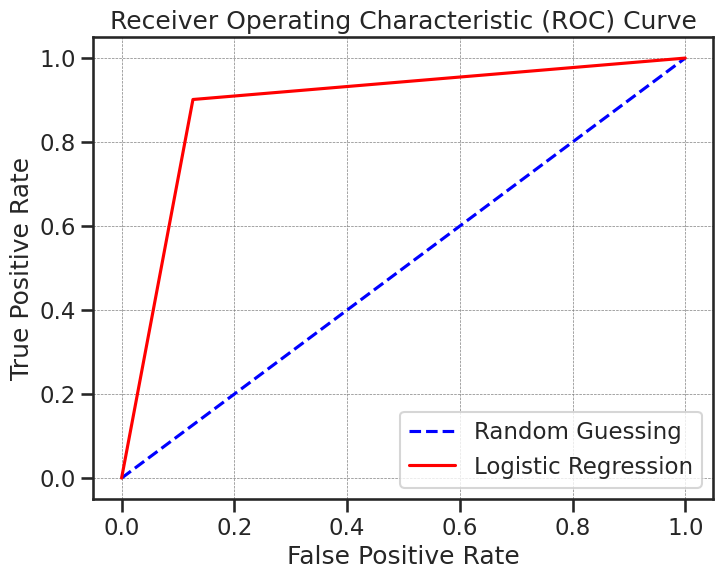

In [97]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', color='blue', label='Random Guessing')
plt.plot(fpr, tpr, label='Logistic Regression', color='red')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.show()


# Project Key Summary

<br>

**`Numerical Anlaysis`**

* Age: Heart disease is more likely to affect older people. It's interesting to note that men tend to get heart disease earlier than women do.

* MaxHR: Lower risk of heart disease is connected with higher maximum heart rates. Age and occurrences of chest discomfort both cause a drop in MaxHR.

* Oldpeak: Elevated Oldpeak levels suggest an increased risk of heart disease.

* RestingBP & Cholesterol: While typically regarded as risk factors, resting blood pressure and cholesterol had rather minimal associations with heart disease in our sample. Only outliers with abnormally high cholesterol levels are linked to heart disease.

<br>

**`Categorical Analysis`**

* Sex: There is a pronounced gender disparity, with males being not only more numerous but also more likely to suffer from heart disease.

* Asymptomatic chest discomfort is a key signal, and people who experience it are more likely to develop heart disease.

* ExerciseAngina: Angina triggered by exercise is a strong predictor of heart disease.

* Resting ECG: The majority of individuals have normal readings, although cardiac disease is more frequently seen in those with left ventricular hypertrophy or ST-T wave abnormalities.

* ST_Slope: A flat ST slope is concerning since it suggests an increased risk of heart disease.


<br>

**`Additional Key Insight`**

* Interactions: Age exhibits interactions with a number of characteristics, including MaxHR and RestingBP, offering possible words for modelling interactions.

* Potential Biases: The dataset shows imbalances in the categories for characteristics like Sex and ChestPainType, which may cause biases in model predictions.
* Features such as ( Oldpeak, MaxHR, RestingECG ) were the most important feature for prediction heart disease.

## Thank you for taking the time to explore my project and for your support in upvoting it, along with a sprinkle of emojis 🙌😊. Your engagement and encouragement are greatly appreciated !!!